Pontifícia Universidade Católica de São Paulo 

`Ciência de Dados e Inteligência Artificial`

🎓 Laboratório 4 - Árvore de decisão

---
> 👨‍🏫*Professor Dr. Rooney Coelho (rracoelho@pucsp.br)*
---

### Sobre o exercício
Neste exercício de laboratório, você aprenderá um algoritmo popular de aprendizado de máquina, a árvore de decisão. 

Você usará este algoritmo de classificação para construir um modelo a partir de dados históricos de pacientes e sua resposta a diferentes medicamentos. 

Em seguida, você usa a árvore de decisão treinada para prever a classe de um paciente desconhecido ou para encontrar um medicamento adequado para um novo paciente.

### Sobre o Dataset
Imagine que você seja um pesquisador médico compilando dados para um estudo. Você coletou dados sobre um conjunto de pacientes, todos com a mesma doença. Durante o curso do tratamento, cada paciente respondeu a um dos 5 medicamentos, medicamento A, medicamento B, medicamento c, medicamento X e Y.

Parte do seu trabalho é construir um modelo para descobrir qual medicamento pode ser apropriado para um futuro paciente com a mesma doença. Os conjuntos de recursos desse conjunto de dados são idade, sexo, pressão arterial e colesterol dos pacientes, e o alvo é o medicamento ao qual cada paciente respondeu.

É um exemplo de classificador binário e você pode usá-lo para construir uma árvore de decisão e, em seguida, usá-la para prever a classe de um paciente desconhecido ou prescrevê-la para um novo paciente.

## Importação dos dados

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

1) Importe o dataset usando o pandas:

In [2]:
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv'
df = pd.read_csv(url)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


Confira se a importação foi bem sucedida ao executar o método `head()`. 

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [17]:
df['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

## Pré-processamento

Declare duas variáveis:
* `X` para as features
* `y` para o target (`Drug`)

2) Preencha o bloco abaixo com um Dataframe para as features somente

In [4]:
df_orded = df.sort_values(by='Drug')

In [5]:
X = df_orded.drop('Drug', axis=1)

3) Preencha o bloco abaixo para o target. Use a estrutura Dataset do Pandas para isso

In [6]:
y = df_orded[['Drug']]

4) Como temos dados categóricos, é necessário que você transforme seus valores em fatores. Use o método `factorize()` do Pandas para isso. Lembre-se que isso te retornará dois argumentos.

*Obs: faça uma pesquisa sobre como fatorizar todas as colunas categóricas. A intenção dessas atividades também é que você tenha facilidade em realizar esse tipo de pesquisa.*

**Encoding utilizando o Pandas**

In [7]:
def preprocessing_pd(df_):
    """
    Ordinal encoding using Pandas
    """
    obj_cols = [col for col in df_.columns if df_[col].dtype == 'object']
    decode_map = dict()
    for col in obj_cols:
        codes, uniques = pd.factorize(df_[col])
        df_[col] = codes
        decode_map[col] = uniques.to_list()
    print(decode_map)
    return df_, decode_map

In [8]:
X_processed, decode_map_X = preprocessing_pd(X)
X_processed

{'Sex': ['M', 'F'], 'BP': ['HIGH', 'LOW', 'NORMAL'], 'Cholesterol': ['HIGH', 'NORMAL']}


,Age,Sex,BP,Cholesterol,Na_to_K
66,29,0,0,0,12.856
144,39,0,0,0,9.664
118,32,1,0,1,10.292
110,50,0,0,0,7.490
36,32,0,0,1,9.445
...,...,...,...,...,...
74,31,0,0,1,17.069
73,41,1,2,1,22.905
71,28,1,2,0,19.675
68,54,0,2,0,24.658


In [9]:
y_processed, decode_map_y = preprocessing_pd(y)
decode_map_y = decode_map_y['Drug']
y_processed

{'Drug': ['drugA', 'drugB', 'drugC', 'drugX', 'drugY']}


,Drug
66,0
144,0
118,0
110,0
36,0
...,...
74,4
73,4
71,4
68,4


**Encoding utilizando o Scikit Learn**

In [10]:
from sklearn.preprocessing import OrdinalEncoder

In [11]:
def preprocessing_sk(df_, encoder=OrdinalEncoder()):
    """
    Ordinal encoding using Scikit Learn
    """
    obj_cols = [col for col in df_.columns if df_[col].dtype == 'object']

    df_processed = df_.copy()
    df_processed[obj_cols] = encoder.fit_transform(df_processed[obj_cols])
    return df_processed, encoder

In [12]:
X_processed_sk, encoder_X = preprocessing_sk(X)
X_processed_sk

,Age,Sex,BP,Cholesterol,Na_to_K
66,29,0,0,0,12.856
144,39,0,0,0,9.664
118,32,1,0,1,10.292
110,50,0,0,0,7.490
36,32,0,0,1,9.445
...,...,...,...,...,...
74,31,0,0,1,17.069
73,41,1,2,1,22.905
71,28,1,2,0,19.675
68,54,0,2,0,24.658


**Verificando se os dois métodos de encoding resultaram em DataFrames iguais**

In [13]:
# Igualando os tipos de dados dos DataFrames
tipos_dados = X_processed.dtypes.to_dict()
X_processed_sk = X_processed_sk.astype(tipos_dados)

# Verificando se os dois métodos de encoding resultaram em DataFrames iguais
X_processed.equals(X_processed_sk)

True

## Criação do modelo

Agora que você já converteu as features em valores numéricos (Com excessão da idade e Na_to_K), faça o que se pede.


5) Crie um classificador árvore de decisão e use o argumento `entropy` para o parâmetro `criterion`. Use o parâmetro `max_depth` igual a 4.

In [14]:
# Criar o modelo
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

6) Treine sua árvore de decisão com a integralidade dos dados.

In [15]:
# Treinar o modelo
model.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

7) Gere um gráfico através do método `plot_tree` use nosso exemplo de sala para se basear (olhem o caderno enviado para vocês).

In [18]:
decode_map_y

['drugA', 'drugB', 'drugC', 'drugX', 'drugY']

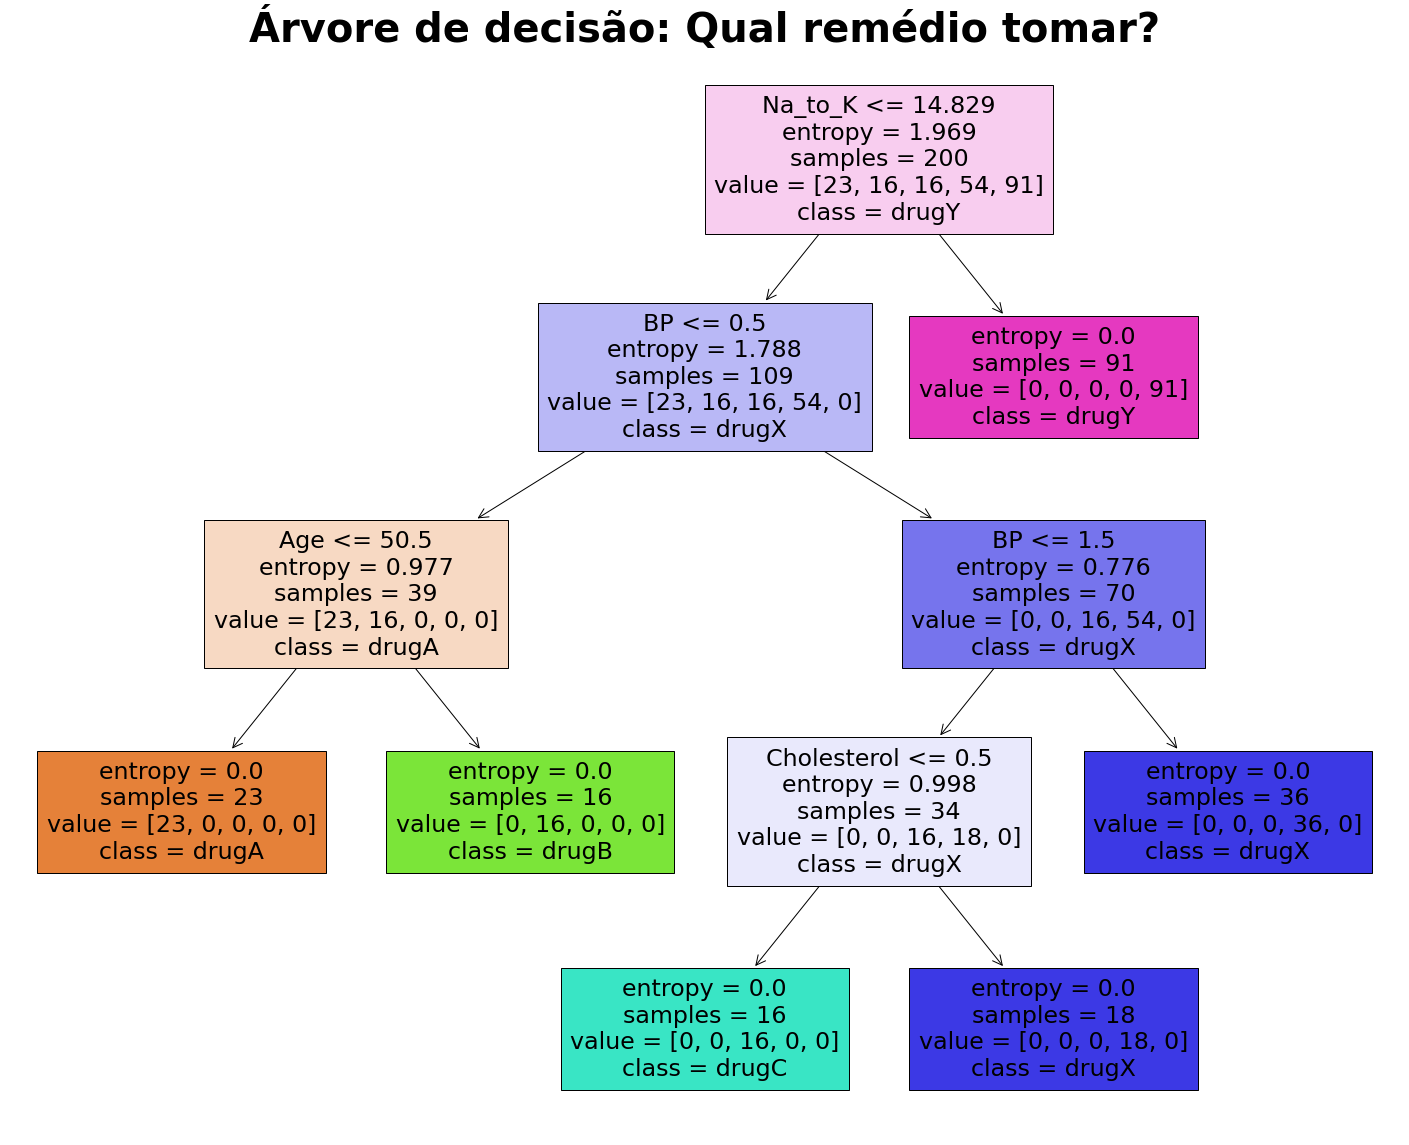

In [16]:
# Gera a figura
plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                     feature_names=X.columns,  
                     class_names=decode_map_y,
                     filled=True)
plt.title('Árvore de decisão: Qual remédio tomar?', weight='bold', size=40);
#fig.savefig('decistion_tree.png')
#fig.savefig('decistion_tree.pdf')

8) Use a árvore de decisão para me indicar (método `predict`) qual remédio tomar:

**Paciente:** 
Rooney Coelho
* Age: 32
* Sexo: M
* BP: NORMAL
* Cholesterol: NORMAL
* Na_to_K: 12

*Obs: Não me passe o medicamento errado!*

In [17]:
dados_paciente = [[32, 'M', 'NORMAL', 'NORMAL', 12]]

In [18]:
dados_paciente_processados, _ = preprocessing_sk(pd.DataFrame(dados_paciente), encoder_X)
dados_paciente_processados

,0,1,2,3,4
0,32,0.0,0.0,0.0,12


In [19]:
y_pred = model.predict(dados_paciente_processados)

**Resposta:**

In [20]:
print(f'O melhor medicamento para se receitar para esse paciente é:\n  {decode_map_y[y_pred[0]]}')

O melhor medicamento para se receitar para esse paciente é:
  drugA


9) Qual a feature mais importante para a árvore? Eu acho que é o sexo. Estou correto? Use o método `feature_importances_` para justificar seu ponto.

In [21]:
ranking_features = (pd.DataFrame({'feature': X.columns, 'importância': model.feature_importances_})
                    .sort_values(by=['importância'], ascending=False)
                   .set_index('feature'))
ranking_features

,importância
feature,
Na_to_K,0.504957
BP,0.312179
Age,0.096732
Cholesterol,0.086132
Sex,0.000000


## Segmentação dos dados e Validação do modelo

In [22]:
from sklearn.model_selection import train_test_split

10) Particione os dados em X_test e X_train para as features e y_train e y_test para os targets. Use a proporção padrão do método `train_test_split` para isso.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_processed, random_state=42)

11) Confira se a quantidade de linhas dos dados para teste e validação são iguais à dos dados antes da particão.

In [24]:
len(X_train) + len(X_test) == len(X)

True

In [25]:
len(y_train) + len(y_test) == len(y)

True

12) Treine o modelo com a partição referente ao treino das features e do target.

In [26]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [27]:
# Treinar o modelo
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

13) Qual é o percentual de acertos do modelo? Utilize a partição dedicada à testes para isso (é perto de 100%)

In [28]:
y_pred = model.predict(X_test)

In [29]:
y_test_np = y_test.to_numpy().reshape(-1)

In [30]:
comparacao = y_pred == y_test_np
comparacao

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True])

In [31]:
# Percentual de acertos
percentual_acertos = comparacao.sum()/len(y_test)
percentual_acertos

0.98

14) Gere a matriz de confusão para mostrar as classificações incorretas. Use a forma de texto ou gere um gráfico para isso.

In [32]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(font_scale=2)

In [33]:
def plot_confusion_matrix(y_test, y_pred, y_categories):
    acuracia = accuracy_score(y_test, y_pred)
    plt.figure(figsize=(15,8))
    plt.title('Matriz de confusão', weight='bold').set_fontsize(30)
    sns.heatmap(
        data=confusion_matrix(y_test, y_pred),
        annot=True,
        fmt='',
        cmap='Blues',
        xticklabels=y_categories,
        yticklabels=y_categories
    )
    plt.xlabel(f'Predicted value\n\naccuracy = {acuracia:.2f}')
    plt.ylabel('True value')
    plt.show()

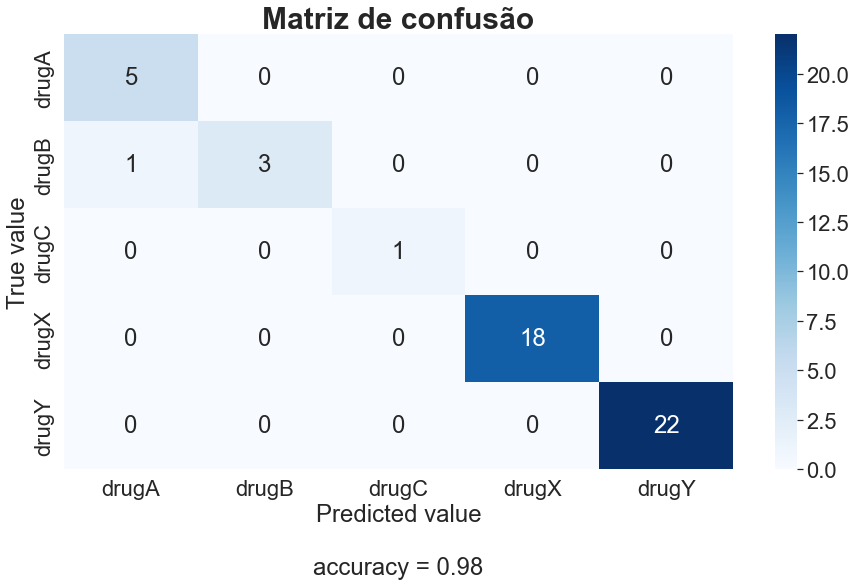

In [34]:
plot_confusion_matrix(y_test, y_pred, decode_map_y)

**Dica:** Use os dados segmentados para validar o modelo. Depois de confirmar que o modelo atende as espectativas, use a totalidade dos dados para o treinamento. Assim um novo dado a ser checadovai contemplar um modelo treinado com a integralidade dos dados.